# Inter Annotator Agreement (IAA) with gitma
This demo uses the demo CATMA project.
If you want to use it for your own annotations you first have to clone your CATMA project locally.
For further information about cloning your CATMA project see [this notebook](https://github.com/forTEXT/gitma/blob/main/demo/notebooks/load_project_from_gitlab.ipynb).

This package provides two methods to compute the agreement of two or more annotators.
Both methods compare annotation collections.
For that reason, it is recommended to use one annotation collection per annotator and document.
Additionally, it is recommended to name every annotation collection by a combination of the <span style="color:pink">document's title</span>, the <span style="color:red">annotation task</span> and the <span style="color:green">annotator</span>.

**Example:**  <span style="color:pink">robinson_crusoe</span>-<span style="color:red">narrative_space</span>-<span style="color:green">mareike</span>

## Table of contents
* [Dependencies](#1-bullet)
* [`get_iaa()`](#2-bullet)
  * [Basic example](#2.1)
  * [Filter by tags](#2.2)
  * [Compare annotation properties](#2.3)
* [`gamma_agreement()`](#3-bullet)

## Dependencies <a class="anchor" id="1-bullet"></a>

### nltk

If you are only interested in IAA metrics such as *Scott's pi*, *Cohen's kappa* and *Krippendorf's alpha*
the [Natural Language Toolkit](https://www.nltk.org/) is sufficient (already installed).

### pygamma-agreement

The gamma agreement takes unitizing as part of annotation tasks into account
(see [Mathet et al. 2015](https://aclanthology.org/J15-3003.pdf)).
For many annotation projects done with CATMA, that might be crucial.
If you want to compute the gamma agreement using this package, the installation of [pygamma-agreement](https://github.com/bootphon/pygamma-agreement) is required:

    pip install pygamma-agreement

Please take note of the **further installation instructions** on the [pygamma-agreement GitHub page](https://github.com/bootphon/pygamma-agreement#installation) and the [*'how to cite'*](https://github.com/bootphon/pygamma-agreement#citing-pygamma)!




In [11]:
# import the CatmaProject class
from gitma import CatmaProject

# load your project
my_project = CatmaProject(
    projects_directory='../Downloads/',
    project_name='CATMA_E55331DD-BC9F-4D67-AC46-B9C03535440B_Evaluation_Sound_Annotation',
)

#https://git.catma.de/102354118766956405180google_com/CATMA_E55331DD-BC9F-4D67-AC46-B9C03535440B_Evaluation_Sound_Annotation.git'


Loading tagsets ...
	Found 1 tagset(s).
Loading documents ...
	Found 2 document(s).
Loading annotation collections ...
	Found 5 annotation collection(s).
	Annotation collection "Alina_se_anno_Verwandlung_Kap1" for document "Kafka Franz Die Verwandlung Kapitel 1 Alina"
		Annotations: 92
	Annotation collection "Intrinsic Markup" for document "Kafka Franz Die Verwandlung Kapitel 1 Svenja"
		Annotations: 105
	Annotation collection "Svenja_se_anno_Verwandlung_Kap_1" for document "Kafka Franz Die Verwandlung Kapitel 1 Alina"
		Annotations: 105
	Annotation collection "Kafka Franz Die Verwandlung Kapitel 1 Svenja Default Annotations" for document "Kafka Franz Die Verwandlung Kapitel 1 Svenja"
		Annotations: 0
	Annotation collection "Gold_anno_Verwandlung_Kap1" for document "Kafka Franz Die Verwandlung Kapitel 1 Alina"
		Annotations: 102


## `get_iaa()` <a class="anchor" id="2-bullet"></a>

The demo project contains three annotation collections.
In this demo we will compute the agreement of the collections 'ac_1' and 'ac_2'.

For every annotation in annotation collection 1 (`ac1_name`) the `get_iaa` method searches for the best matching annotation
in annotation collection 2 (`ac2_name`) with respect to its annotation text span.
The following examples show how matching annotations in two annotation collections are identified:

<img src="img/best_match_example_iaa.png">

In contrast to the `gamma_agreement` method (see below), the `get_iaa` method only considers the best matching annotations
from both annotation collections when computing the IAA value.

### Basic example <a class="anchor" id="2.1"></a>

First, we will take look at both annotation collections by comparing the annotation spans.

In [12]:
# compare the annotation collections by start point
my_project.compare_annotation_collections(
    annotation_collections=['Alina_se_anno_Verwandlung_Kap1', 'Svenja_se_anno_Verwandlung_Kap_1']
)

As the line plot shows, every annotation in annotation collection 'ac_1' has a matching annotation in annotation collection 'ac_2'.

Now, let's compute the IAA for all matching annotations:

In [15]:
my_project.get_iaa(
    ac1_name='Alina_se_anno_Verwandlung_Kap1',
    ac2_name='Svenja_se_anno_Verwandlung_Kap_1'
)


Finished search for overlapping annotations in:
- Alina_se_anno_Verwandlung_Kap1
- Svenja_se_anno_Verwandlung_Kap_1
Could match 92 annotations.
Average overlap is 92.92 %.
Couldn't match 8 annotation(s) in first annotation collection.


Results for "tag"
-----------------
Scott's Pi:          0.5549412577747063
Cohen's Kappa:       0.5660377358490566
Krippendorf's Alpha: 0.5573600552868003

Confusion Matrix
                -------



,#None#,character_sound,ambient_sound
#None#,0,8,0
character_sound,0,66,0
ambient_sound,0,6,12


The `get_iaa` method not only returns 3 different agreement scores,
but also reports the number of annotation pairs considered when computing the IAA scores
and the average overlap of the annotation pairs.
Additionally, the method returns a confusion matrix to give an insight into the relation between the tags.
As you can see in the matrix, in 2 cases an annotation with the tag 'non_event' in annotation collection 1
has a best match in annotation collection 2 with the same tag.
Compare this with the line plot above.

### Filter by tags <a class="anchor" id="2.2"></a>

There may occur cases in which you don't want to include all annotations in the computing of
the IAA scores.
In those cases just use the `tag_filter` parameter, which expects a list of tag names.

In [20]:
my_project.get_iaa(
    ac1_name='Alina_se_anno_Verwandlung_Kap1',
    ac2_name='Svenja_se_anno_Verwandlung_Kap_1',
    tag_filter=['character_sound']
)


Finished search for overlapping annotations in:
- Alina_se_anno_Verwandlung_Kap1
- Svenja_se_anno_Verwandlung_Kap_1
Could match 80 annotations.
Average overlap is 93.29 %.
Couldn't match 8 annotation(s) in first annotation collection.


Results for "tag"
-----------------
Scott's Pi:          -0.07074569789674971
Cohen's Kappa:       0.0
Krippendorf's Alpha: -0.06405353728489493

Confusion Matrix
                -------



,#None#,character_sound,ambient_sound
#None#,0,8,0
character_sound,0,66,0
ambient_sound,0,6,0


As the confusion matrix shows, only the annotations from annotation collection 1
with the tag 'process_event' have been taken into account.
From annotation collection 2 there are still two annotations considered, with the tags 'stative_event' and 'change_of_state' respectively.
But we can filter both annotation collections, too: 

In [21]:
my_project.get_iaa(
    ac1_name='Alina_se_anno_Verwandlung_Kap1',
    ac2_name='Svenja_se_anno_Verwandlung_Kap_1',
    tag_filter=['ambient_sound'],
    filter_both_ac=True
)


Finished search for overlapping annotations in:
- Alina_se_anno_Verwandlung_Kap1
- Svenja_se_anno_Verwandlung_Kap_1
Could match 12 annotations.
Average overlap is 90.69 %.
Couldn't match 0 annotation(s) in first annotation collection.

Couldn't find compute IAA for tag due to missing overlapping annotations with the given settings.

Results for "tag"
-----------------
Scott's Pi:          0
Cohen's Kappa:       0
Krippendorf's Alpha: 0

Confusion Matrix
                -------



,ambient_sound
ambient_sound,12


### Compare annotation properties <a class="anchor" id="2.3"></a>

The tag is only one level of CATMA annotations.
If you want to compare annotations by their properties this is possible too.
In the demo project the annotations have the property 'representation_type' to evaluate if a speech
or mental event is referenced in the text:

In [22]:
my_project.compare_annotation_collections(
    annotation_collections=['Alina_se_anno_Verwandlung_Kap1', 'Svenja_se_anno_Verwandlung_Kap_1'],
    color_col='prop:loudness'
)

To compute the agreement of annotation properties you just need to use the `level` parameter:

In [ ]:
my_project.get_iaa(
    ac1_name='ac_1',
    ac2_name='ac_2',
    level='prop:representation_type'
)

## `gamma_agreement()` <a class="anchor" id="3-bullet"></a>

To compute the gamma agreement, in addition to the annotation collections, 5 further parameters
have to be defined.
The `alpha`, `beta` and `delta_empty` parameters are necessary to compute the
[`CombinedCategoricalDissimilarity`](https://github.com/bootphon/pygamma-agreement/blob/master/pygamma_agreement/dissimilarity.py#L467).
The `n_samples` and the `precision_level` values are used in the 
[`compute_gamma()` method](https://github.com/bootphon/pygamma-agreement/blob/master/pygamma_agreement/continuum.py#L805).
See the documentation for pygamma-agreement and
[Mathet et al. 2015](https://aclanthology.org/J15-3003.pdf)
for further information about these parameters.

In [27]:
!pip install pygamma-agreement

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [58]:
# gamma agreement with default settings
my_project.gamma_agreement(
    annotation_collections=['Alina_se_anno_Verwandlung_Kap1', 'Svenja_se_anno_Verwandlung_Kap_1'],
    alpha=3,
    beta=1,
    delta_empty=0.01,
    n_samples=30,
    precision_level=0.01
)

AssertionError: Disorder cannot be computed with less than two annotators, or without annotations.

If you want to work with a different dissimillarity algorithm,
consider using pygamma-agreement directly.
For this purpose you can save all annotations in a project as a CSV file
in the format pygamma-agreement takes as input:

In [26]:
pygamma_df = my_project.pygamma_table(
    annotation_collections=['Alina_se_anno_Verwandlung_Kap1', 'Svenja_se_anno_Verwandlung_Kap_1']
)

# save
pygamma_df.to_csv('../downloads/CATMA_E55331DD-BC9F-4D67-AC46-B9C03535440B_Evaluation_Sound_Annotation/pygamma_table.csv', index=False, header=False)

# show example
pygamma_df.head(5)

,annotator,tag,start_point,end_point
0,102354118766956405180google_com,ambient_sound,679,728
1,102354118766956405180google_com,ambient_sound,4302,4331
2,102354118766956405180google_com,ambient_sound,5754,5799
3,102354118766956405180google_com,character_sound,5803,5862
4,102354118766956405180google_com,character_sound,5877,5886


The following is Svenja's own extension of the GitMA notebook to try the pygamma agreement with the code taken from the documentation (https://pygamma-agreement.readthedocs.io/en/latest/quickstart.html).

In [32]:
#Sample Data from pygamma example to try the code

from pygamma_agreement import Continuum
from pyannote.core import Segment

continuum = Continuum()
continuum.add("Annotator1", Segment(2.5, 4.3), "Maureen")
continuum.add("Annotator1", Segment(4.6, 7.4), "Marvin")
continuum.add("Annotator1", Segment(8.2, 11.4), "Marvin")
continuum.add("Annotator1", Segment(13.5, 16.0), "Robin")

continuum.add("Annotator2", Segment(2.3, 4.5), "Maureen")
continuum.add("Annotator2", Segment(4.3, 7.2), "Marvin")
continuum.add("Annotator2", Segment(7.9, 11.2), "Robin")
continuum.add("Annotator2", Segment(13.0, 16.1), "Maureen")

continuum.add("Annotator3", Segment(2.5, 4.3), "Maureen")
continuum.add("Annotator3", Segment(4.6, 11.5), "Marvin")
continuum.add("Annotator3", Segment(13.1, 17.1), "Robin")

/Users/guhr/opt/anaconda3/lib/python3.9/site-packages/pygamma_agreement/notebook.py:358: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



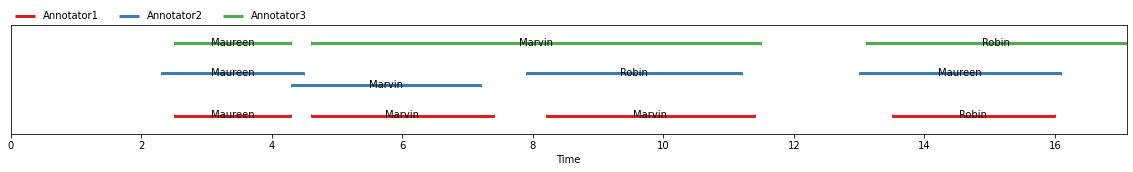

In [33]:
from pygamma_agreement import show_continuum
show_continuum(continuum, labelled=True)

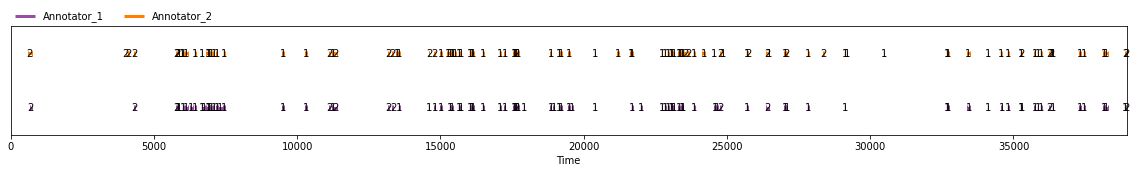

In [52]:

continuum = Continuum.from_csv('/Users/guhr/Downloads/CATMA_E55331DD-BC9F-4D67-AC46-B9C03535440B_Evaluation_Sound_Annotation/pygamma_table_Verwandlung.csv')

continuum






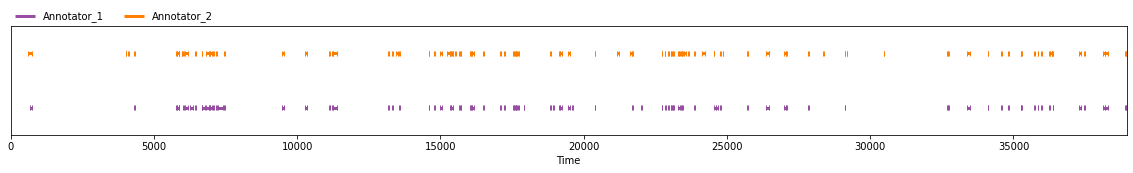

In [57]:
from pygamma_agreement import show_continuum
show_continuum(continuum, labelled=False)

In [59]:
from pygamma_agreement import CombinedCategoricalDissimilarity

dissim = CombinedCategoricalDissimilarity(alpha=1, beta=2)

In [60]:
gamma_results = continuum.compute_gamma(dissim)
print(f"The gamma for that annotation is f{gamma_results.gamma}")

Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used


Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used


Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used


Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used


Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
Long-step dual simplex will be used
The gamma for that annotation is f0.8217608008927961


/Users/guhr/opt/anaconda3/lib/python3.9/site-packages/pygamma_agreement/notebook.py:368: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



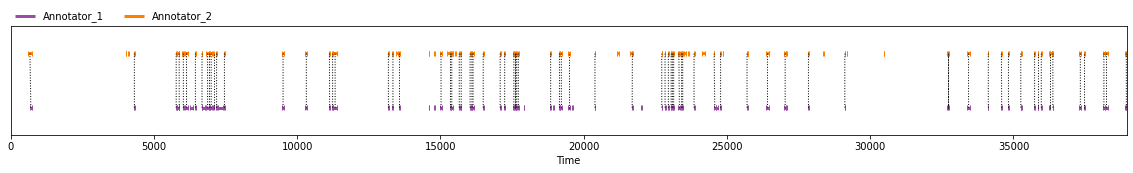

In [44]:
from pygamma_agreement import show_alignment
show_alignment(gamma_results.best_alignment, labelled=False)